In [3]:
import os
import pandas as pd

output_folder        = '../../AIzymes_IC50'
df_out               = 'OXA48_IC50.csv'
prep_df_in           = 'OXA48_IC50_prep.csv'
reference_seq        = 'reference_sequence.seq' 

os.makedirs(output_folder, exist_ok=True)

# Construct the full file path
file_path           = os.path.join(output_folder, prep_df_in)
reference_file_path = os.path.join(output_folder, reference_seq)
df_out_path         = os.path.join(output_folder, df_out)

# Check if the file exists and load the DataFrame
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    print(f"File not found: {file_path}")

# Check if the reference sequence file exists and load it
if os.path.exists(reference_file_path):
    with open(reference_file_path, 'r') as f:
        reference_sequence = f.read().strip()  # Strip any extra whitespace/newlines
else:
    print(f"Reference sequence file not found: {reference_file_path}")

# Loop through the DataFrame and apply the mutations
sequences = []  # List to store the new sequences after applying mutations
for idx, row in df.iterrows():
    
    mutations = row['mutations']  # Get the mutations for the current row
    new_sequence = list(reference_sequence) 
    
    if pd.notna(mutations):  # Check if mutations is not NaN
        # Split the mutations by '/' and apply them one by one
        for mutation in mutations.split('/'):
            original_aa = mutation[0]  # The original amino acid
            position = int(mutation[1:-1]) - 1  # The position (convert to 0-based index)
            new_aa = mutation[-1]  # The new amino acid

            # Check if the original amino acid matches the reference sequence at the position
            if reference_sequence[position] == original_aa:
                new_sequence[position] = new_aa  # Apply the mutation
            else:
                print(f"Warning: Mutation {mutation} does not match the reference sequence at position {position + 1}")

    # Join the mutated sequence list back into a string and store it in the sequences list
    sequences.append(''.join(new_sequence))

# Add the new 'sequence' column to the DataFrame
df['sequence'] = sequences

# Display the updated DataFrame
display(df)

# Optionally, save the updated DataFrame to a new CSV file
df.to_csv(df_out_path, index=False)
print(f"Updated DataFrame saved to {df_out_path}")

,name,mutations,substrate,kcat,dkcat,KM,dKM,kcat_KM,dkcat_KM,short code,no. mutations,IC50,dIC50,MIC,sequence
0,wtOXA-48,NaN,CAZ,0.0028,0.0008,247.0,140.0,11.0,11.0,AFST,0,0.013,0.002,0.03,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...
1,NaN,A33V,CAZ,NaN,NaN,NaN,NaN,NaN,NaN,VFST,1,0.017,0.004,0.03,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNVHFTEHKSQGVVVL...
2,NaN,F72L,CAZ,0.0049,0.0004,18.0,5.0,281.0,281.0,ALST,1,0.029,0.006,0.12,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...
3,NaN,S212A,CAZ,NaN,NaN,NaN,NaN,24.0,24.0,AFAT,1,0.015,0.002,0.03,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...
4,NaN,T213A,CAZ,NaN,NaN,NaN,NaN,31.0,31.0,AFSA,1,0.012,0.001,0.03,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...
5,NaN,F72L/S212A,CAZ,0.0037,0.0003,7.0,3.0,565.0,565.0,ALSA,2,0.177,0.063,1.00,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...
6,NaN,F72L/T213A,CAZ,0.0180,0.0005,53.0,5.0,339.0,339.0,ALAT,2,0.140,0.003,0.50,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...
7,NaN,A33V/F72L,CAZ,NaN,NaN,NaN,NaN,NaN,NaN,VLST,2,0.034,0.002,0.12,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNVHFTEHKSQGVVVL...
8,NaN,S212A/T213A,CAZ,NaN,NaN,NaN,NaN,98.0,98.0,AFAA,2,0.023,0.005,0.06,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...
9,NaN,A33V/S212A,CAZ,NaN,NaN,NaN,NaN,NaN,NaN,VFAT,2,0.014,0.001,0.03,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNVHFTEHKSQGVVVL...


Updated DataFrame saved to ../../AIzymes_IC50\OXA48_IC50.csv


### PLM trainer loaded. ###
### Data loaded from: ../../AIzymes_IC50/OXA48_IC50.csv ###
### Data normalized. ###
train_df


,sequence,IC50,norm_IC50
2,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,0.012,0.000000
5,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,0.177,0.329341
15,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNVHFTEHKSQGVVVL...,0.034,0.043912
8,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNVHFTEHKSQGVVVL...,0.020,0.015968
0,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,0.023,0.021956
7,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,0.029,0.033932
14,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNVHFTEHKSQGVVVL...,0.148,0.271457
4,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,0.389,0.752495
11,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNVHFTEHKSQGVVVL...,0.017,0.009980
9,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNVHFTEHKSQGVVVL...,0.014,0.003992


test_df


,sequence,IC50,norm_IC50
12,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNVHFTEHKSQGVVVL...,0.513,1.000000
3,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,0.013,0.001996
6,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,0.140,0.255489
10,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNVHFTEHKSQGVVVL...,0.015,0.005988


100%|██████████| 100/100 [09:24<00:00,  5.65s/it]


PLM facebook/esm2_t6_8M_UR50D trained for norm_IC50


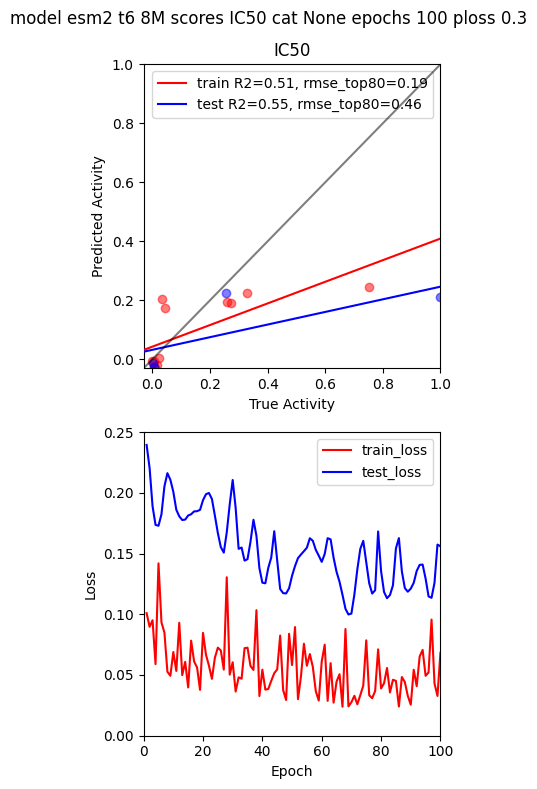

In [5]:
%run src/plm_trainer_multi_small.py
from src.tools import reset_cuda
reset_cuda()

output_folder        = '../../AIzymes_IC50'
df_path               = output_folder+'/OXA48_IC50.csv'

reset_cuda()
scores          = ['IC50','kcat','kcat_KM']
scores          = ['IC50']

dataset = PLM_trainer(
    output_folder   = output_folder,
    verbose         = False
    )

PLM_trainer.load_dataset(    
    dataset,            
    df_path         = df_path,
    scores          = scores,
    labels          = [],
    select_unique   = True,
    print_testtrain = True,
    normalize       = 'minmax'
    )

PLM_trainer.train_PLM( 
    dataset,
    epochs          = 100,
    esm2_model_name = "facebook/esm2_t6_8M_UR50D",
    p_loss          = 0.3,
    liveplot        = False,
    overwrite       = True
)


In [ ]:
%run src/plm_trainer_multi.py
output_folder = '../../AIzymes_resi99_multi'
plot_summary(output_folder, models = ['facebook/esm2_t6_8M_UR50D', 'facebook/esm2_t12_35M_UR50D', 'facebook/esm2_t30_150M_UR50D'])